# Resolviendo el problema de la Torre de Hanoi usando BFS

Resolver el problema de la Torre de Hanoi utilizando el algoritmo de búsqueda en anchura (BFS) y visualizando las posibles soluciones en forma de grafo.


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

---

## Función para generar el grafo de la Torre de Hanoi utilizando BFS

La función `bfs_hanoi_graph(n)` genera un grafo dirigido que representa todos los movimientos posibles entre estados de la Torre de Hanoi usando BFS. También retorna el camino correcto que resuelve el problema.

### Parámetros:
- `n`: El número de discos en la Torre de Hanoi.

### Explicación de la lógica:
1. **Estado inicial y final**: Se define el estado inicial con todos los discos en la primera torre y el estado objetivo con todos los discos en la tercera torre.
2. **Búsqueda en anchura (BFS)**: Usamos una cola para explorar los estados posibles y un conjunto para evitar visitar los mismos estados repetidamente.
3. **Movimientos posibles**: En cada iteración, movemos discos entre las torres respetando las reglas del juego y añadimos los estados resultantes como aristas en el grafo.


In [18]:
def bfs_hanoi_graph(n):
    G = nx.DiGraph()

    initial_state = (tuple(range(n, 0, -1)), (), ())
    goal_state = ((), (), tuple(range(n, 0, -1)))

    queue = deque([(initial_state, [])])
    visited = set()

    while queue:
        current_state, path = queue.popleft()

        if current_state == goal_state:
            return G, path

        if current_state in visited:
            continue

        visited.add(current_state)

        for source in range(3):
            if current_state[source]:
                disk_to_move = current_state[source][-1]
                for target in range(3):
                    if source != target:
                        if not current_state[target] or current_state[target][-1] > disk_to_move:
                            new_state = list(map(list, current_state))
                            new_state[source].pop()
                            new_state[target].append(disk_to_move)
                            new_state = tuple(map(tuple, new_state))

                            if new_state not in visited:
                                G.add_edge(current_state, new_state)
                                queue.append((new_state, path + [(source, target)]))

    return G, None

---

## Función para visualizar el grafo de las soluciones

La función `draw_solution_paths(G, solution, n)` nos ayuda a visualizar los caminos correctos e incorrectos en el grafo.

### Parámetros:
- `G`: El grafo que representa los movimientos posibles.
- `solution`: El camino correcto que resuelve el problema de la Torre de Hanoi.
- `n`: El número de discos.

### Explicación de la visualización:
1. **Caminos correctos e incorrectos**: Dibujamos el grafo completo, diferenciando los caminos correctos en verde y los incorrectos en rojo.
2. **Grafo simplificado**: Mostramos un grafo solo con el camino correcto para mayor claridad.


In [19]:
def draw_solution_paths(G, solution, n):
    correct_edges = []
    incorrect_edges = []

    if solution:
        solution_states = [()]
        current_state = (tuple(range(n, 0, -1)), (), ())
        solution_states = [current_state]
        for move in solution:
            source, target = move
            current_state = list(map(list, current_state))
            disk = current_state[source].pop()
            current_state[target].append(disk)
            current_state = tuple(map(tuple, current_state))
            solution_states.append(current_state)

        for edge in G.edges():
            if edge in zip(solution_states[:-1], solution_states[1:]):
                correct_edges.append(edge)
            else:
                incorrect_edges.append(edge)

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=incorrect_edges, edge_color='red')
    nx.draw_networkx_edges(G, pos, edgelist=correct_edges, edge_color='green', width=2)
    plt.title(f"Grafo - Caminos incorrectos y correcto con {n} discos")
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(12, 12))
    G_simplified = nx.DiGraph()
    G_simplified.add_edges_from(correct_edges)
    pos_simplified = nx.spring_layout(G_simplified)
    nx.draw(G_simplified, pos_simplified, with_labels=True, node_size=700, edge_color='green', node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo - Solo el camino correcto con {n} discos")
    plt.axis('off')
    plt.show()


---

## Ejecución del algoritmo con 3 discos

Ahora ejecutamos el algoritmo con 3 discos y generamos el grafo que representa los movimientos posibles.


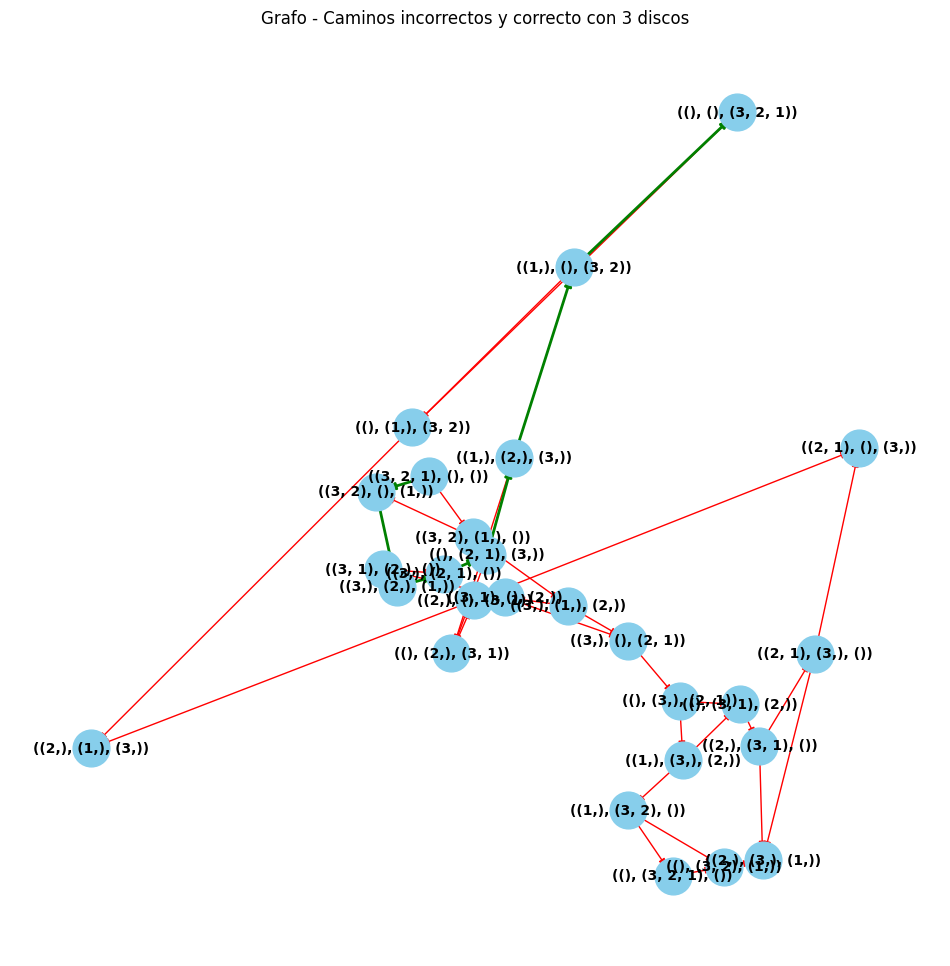

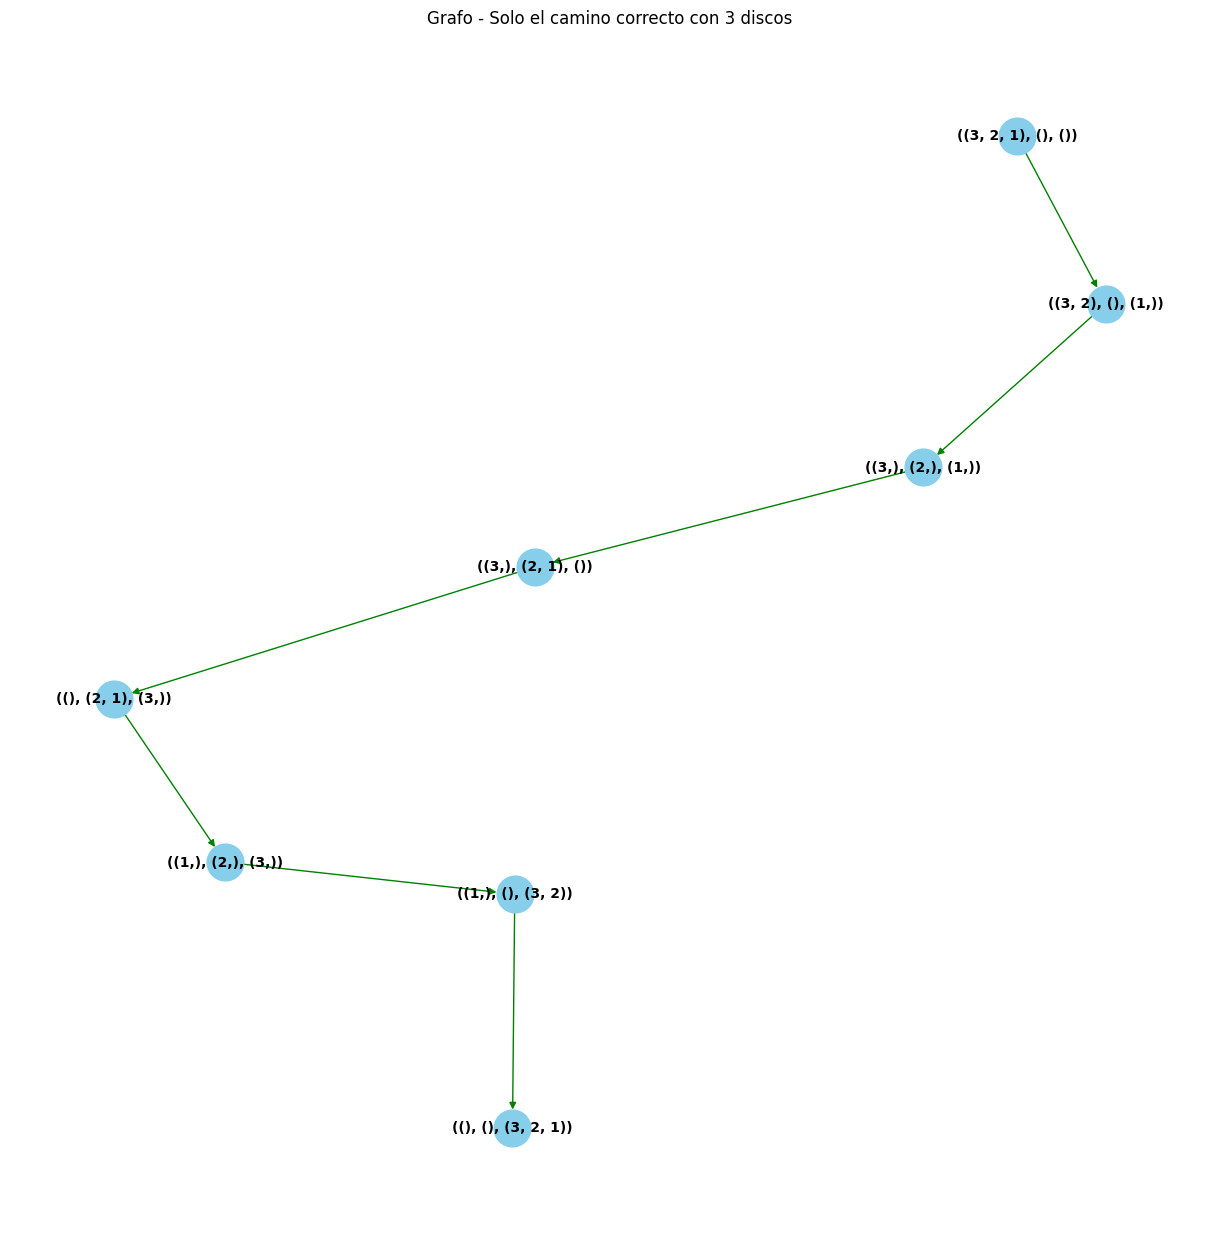

Solución BFS con 3 discos: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]


In [20]:
n = 3
G, solution = bfs_hanoi_graph(n)

# Visualizar los caminos correctos e incorrectos
draw_solution_paths(G, solution, n)

# Imprimir la solución en pasos
print(f"Solución BFS con {n} discos: {solution}")


---

### Conclusión:

Este notebook muestra cómo resolver el problema de la Torre de Hanoi utilizando el algoritmo de BFS y cómo visualizar el grafo de soluciones. El código nos permite identificar claramente los caminos correctos e incorrectos, proporcionando una comprensión visual del proceso de resolución.


# Resolviendo el problema de la Torre de Hanoi usando DFS

En esta parte del código se muestra cómo resolver el problema de la Torre de Hanoi utilizando el algoritmo de búsqueda en profundidad (DFS) y visualizando las posibles soluciones en forma de grafo.

---

## Importación de las librerías necesarias

Primero, importamos las librerías `networkx` para trabajar con grafos y `matplotlib` para la visualización.


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

---

## Función para generar el grafo de la Torre de Hanoi utilizando DFS

La función `dfs_hanoi_graph(n)` genera un grafo dirigido que representa todos los movimientos posibles entre estados de la Torre de Hanoi usando DFS. También retorna el camino correcto que resuelve el problema.

### Parámetros:
- `n`: El número de discos en la Torre de Hanoi.

### Explicación de la lógica:
1. **Estado inicial y final**: Se define el estado inicial con todos los discos en la primera torre y el estado objetivo con todos los discos en la tercera torre.
2. **Búsqueda en profundidad (DFS)**: Usamos una pila para explorar los estados posibles y un conjunto para evitar visitar los mismos estados repetidamente.
3. **Movimientos posibles**: En cada iteración, movemos discos entre las torres respetando las reglas del juego y añadimos los estados resultantes como aristas en el grafo.


In [22]:
def dfs_hanoi_graph(n):
    # Crea un grafo vacío
    G = nx.DiGraph()

    # Estado inicial (todos los discos en la torre 0)
    initial_state = (tuple(range(n, 0, -1)), (), ())

    # Estado objetivo (todos los discos en la torre 2)
    goal_state = ((), (), tuple(range(n, 0, -1)))

    # Pila para DFS y un conjunto para verificar los estados ya visitados
    stack = [(initial_state, [])]  # Guarda el estado actual y el camino recorrido
    visited = set()

    # DFS loop
    while stack:
        current_state, path = stack.pop()

        if current_state == goal_state:
            return G, path  # Retornar el grafo y el camino encontrado

        if current_state in visited:
            continue

        visited.add(current_state)

        # Generar movimientos posibles
        for source in range(3):  # Tres torres
            if current_state[source]:  # Verificar si hay discos en la torre source
                disk_to_move = current_state[source][-1]  # Disco más pequeño de la torre source
                for target in range(3):
                    if source != target:  # No mover a la misma torre
                        # Regla 1: Solo se puede mover un disco a la vez
                        # Regla 2: Un disco grande no puede colocarse sobre un disco pequeño
                        if not current_state[target] or disk_to_move < current_state[target][-1]:
                            new_state = list(map(list, current_state))  # Copiar el estado actual
                            new_state[source].pop()  # Quitar el disco de la torre source
                            new_state[target].append(disk_to_move)  # Moverlo a la torre target
                            new_state = tuple(map(tuple, new_state))  # Convertir a tupla para que sea hashable

                            if new_state not in visited:
                                G.add_edge(current_state, new_state)  # Añadir la transición como una arista en el grafo
                                stack.append((new_state, path + [(source, target)]))

    return G, None  # Si no hay solución (no debería pasar en Torres de Hanoi)

---

## Función para visualizar el grafo de las soluciones

La función `draw_solution_paths(G, solution, n)` nos ayuda a visualizar los caminos correctos e incorrectos en el grafo.

### Parámetros:
- `G`: El grafo que representa los movimientos posibles.
- `solution`: El camino correcto que resuelve el problema de la Torre de Hanoi.
- `n`: El número de discos.

### Explicación de la visualización:
1. **Caminos correctos e incorrectos**: Dibujamos el grafo completo, diferenciando los caminos correctos en verde y los incorrectos en rojo.
2. **Grafo simplificado**: Mostramos un grafo solo con el camino correcto para mayor claridad.


In [23]:
def draw_solution_paths(G, solution, n):
    # Crear subgrafos para caminos correctos e incorrectos
    correct_edges = []
    incorrect_edges = []

    # Crear lista de estados a partir del camino de solución
    if solution:
        solution_states = [()]
        current_state = (tuple(range(n, 0, -1)), (), ())
        for move in solution:
            source, target = move
            current_state = list(map(list, current_state))
            disk = current_state[source].pop()
            current_state[target].append(disk)
            current_state = tuple(map(tuple, current_state))
            solution_states.append(current_state)

        # Rellenar aristas correctas e incorrectas
        for edge in G.edges():
            if edge in zip(solution_states[:-1], solution_states[1:]):
                correct_edges.append(edge)
            else:
                incorrect_edges.append(edge)

    # Grafo 1: Visualización general de todos los caminos incorrectos y el correcto en verde
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # Posiciones de los nodos para la visualización
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='red', edgelist=incorrect_edges, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='green', edgelist=correct_edges, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo DFS - Caminos incorrectos y correcto con {n} discos")
    plt.show()

    # Grafo 2: Visualización simplificada solo con el camino correcto
    plt.figure(figsize=(12, 12))
    G_simplified = nx.DiGraph()
    G_simplified.add_edges_from(correct_edges)  # Solo añadir las aristas correctas al nuevo grafo
    pos_simplified = nx.spring_layout(G_simplified)  # Layout para el grafo simplificado
    nx.draw(G_simplified, pos_simplified, with_labels=True, node_size=700, edge_color='green', node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo DFS - Solo el camino correcto con {n} discos")
    plt.show()

---

## Ejecución del algoritmo con 3 discos

Ahora ejecutamos el algoritmo con 3 discos y generamos el grafo que representa los movimientos posibles.


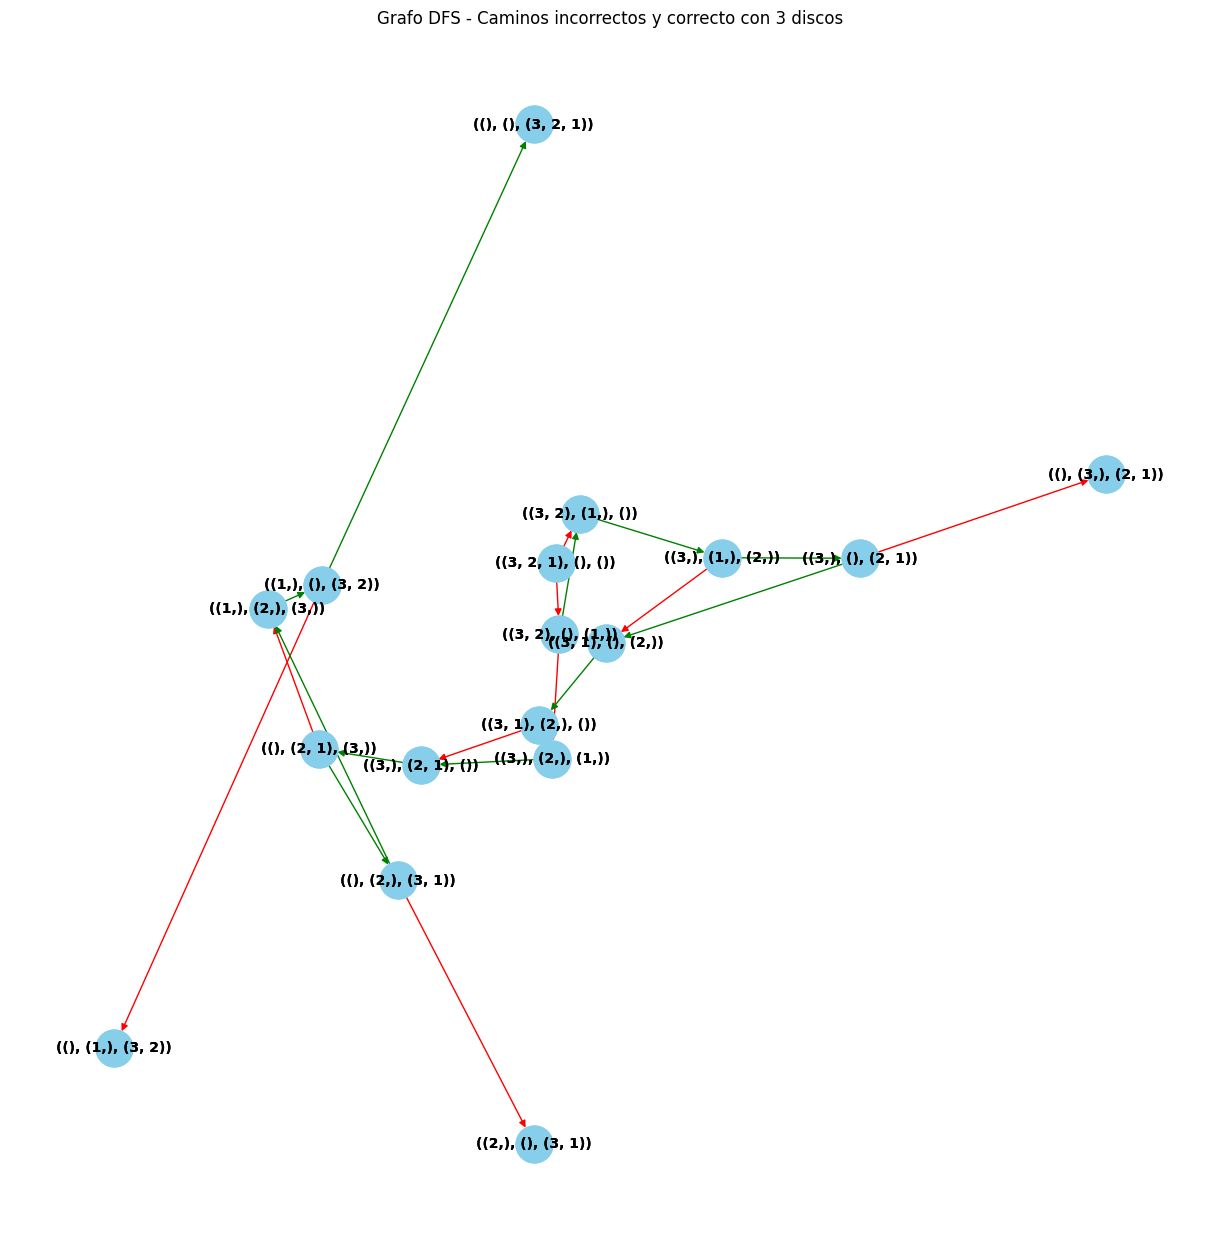

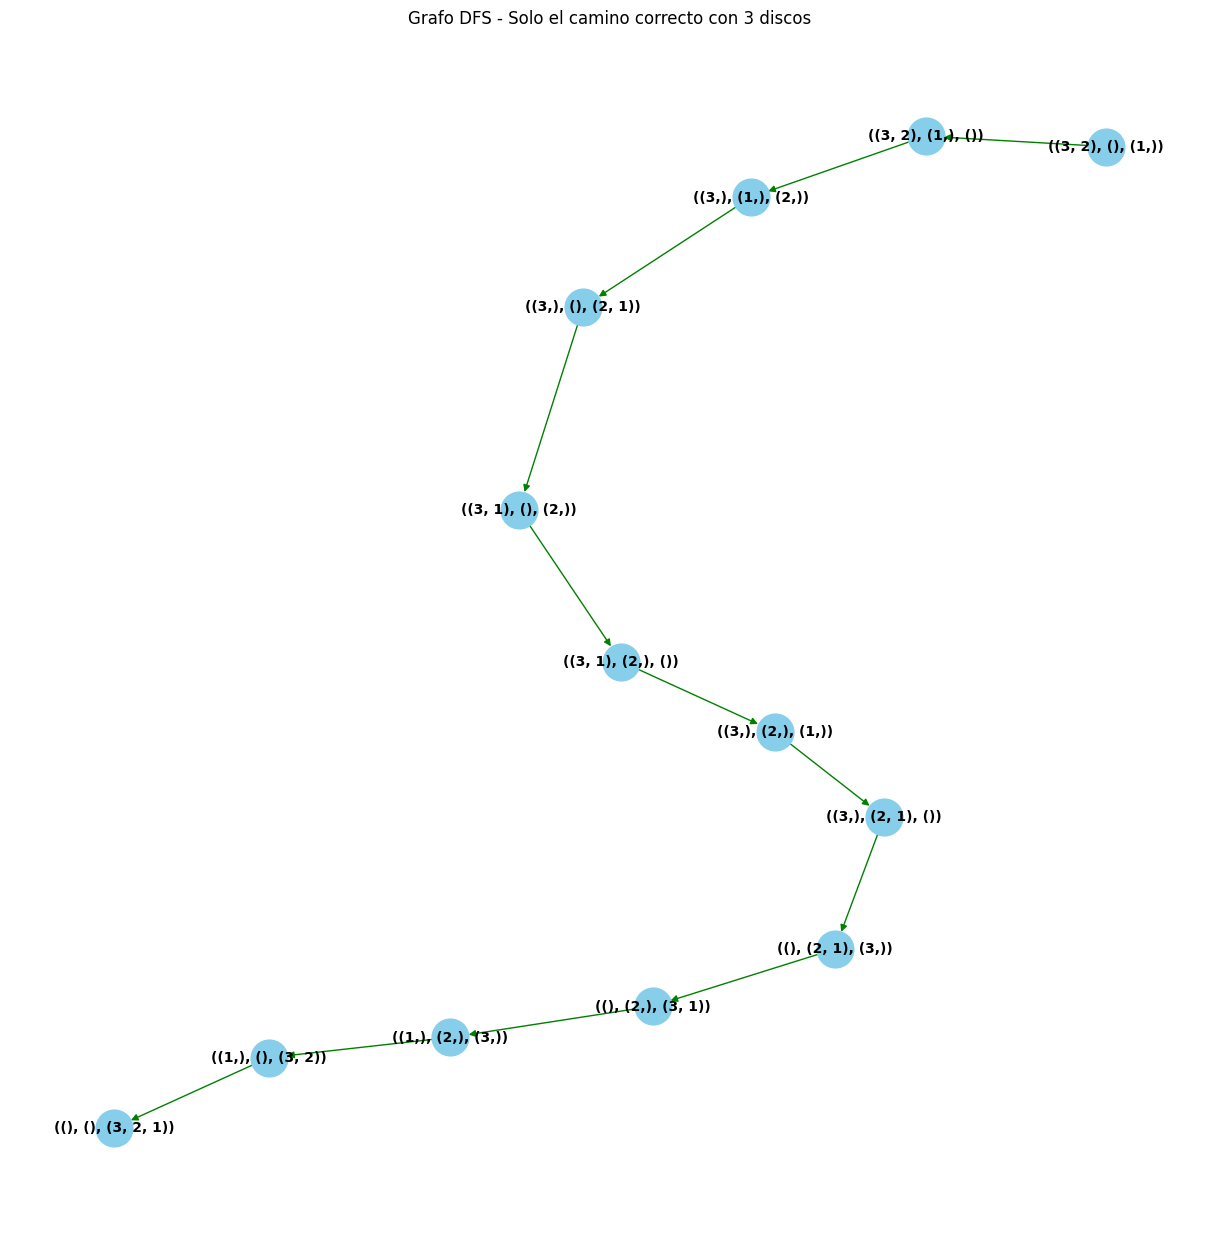

Solución DFS con 3 discos: [(0, 2), (2, 1), (0, 2), (1, 2), (2, 0), (2, 1), (0, 2), (2, 1), (0, 2), (1, 2), (2, 0), (1, 2), (0, 2)]


In [25]:
n = 3
G, solution = dfs_hanoi_graph(n)

# Visualizar los caminos correctos e incorrectos
draw_solution_paths(G, solution, n)

# Imprimir la solución en pasos
print(f"Solución DFS con {n} discos: {solution}")


---

### Conclusión:

Este notebook muestra cómo resolver el problema de la Torre de Hanoi utilizando el algoritmo DFS y cómo visualizar el grafo de soluciones. El código nos permite identificar claramente los caminos correctos e incorrectos, proporcionando una comprensión visual del proceso de resolución.


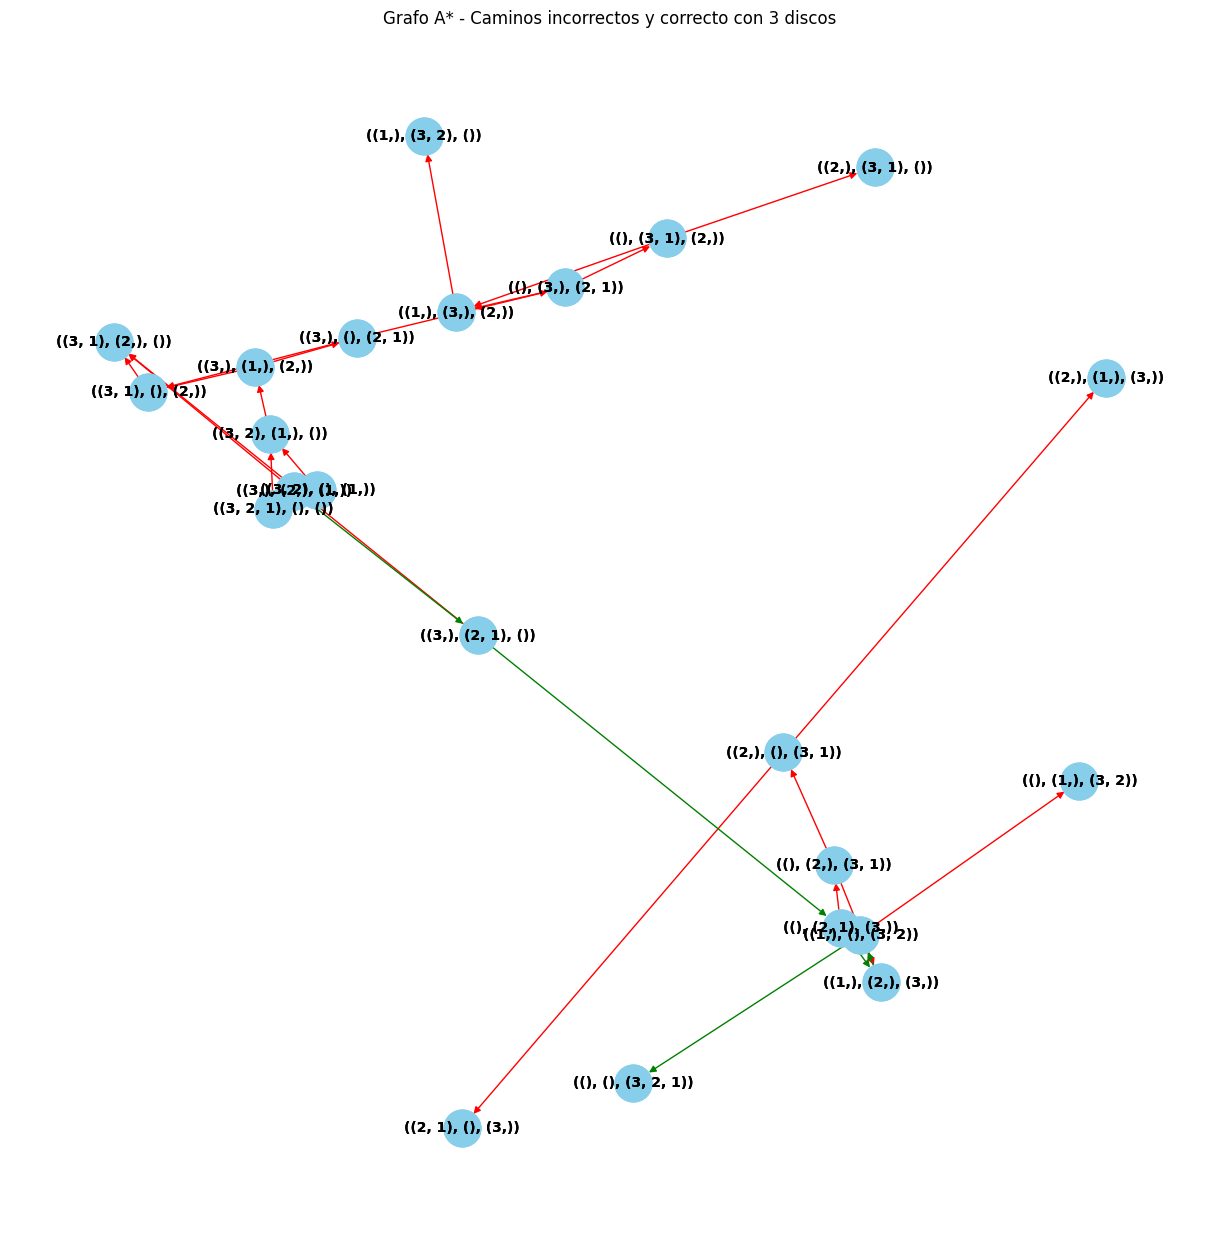

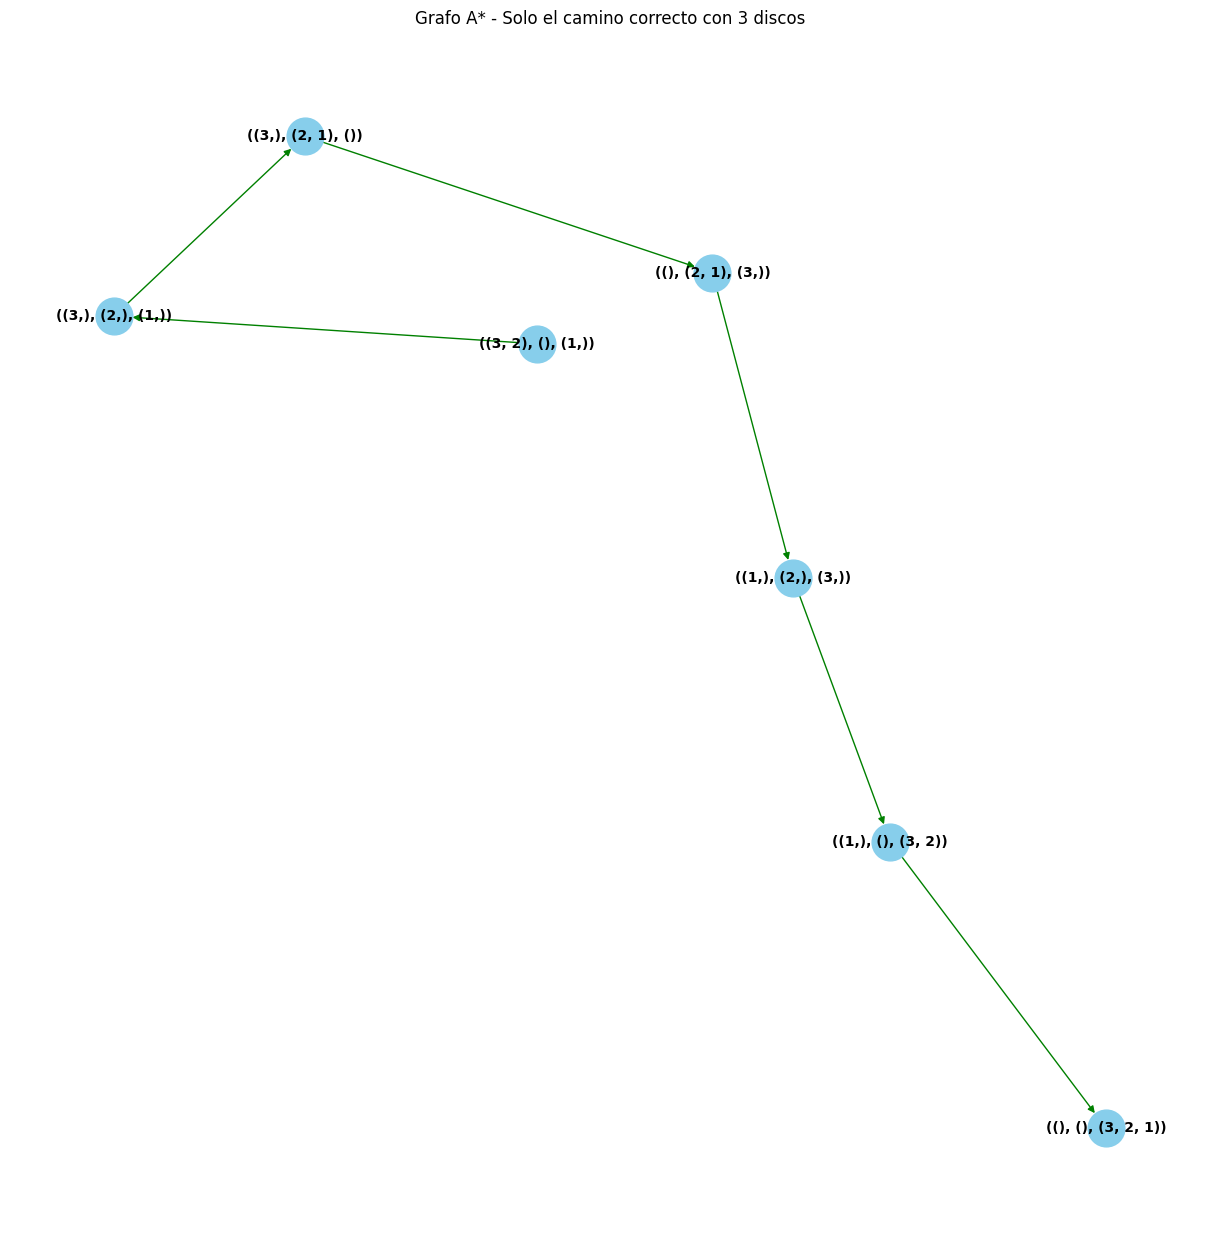

Solución A* con 3 discos: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]


In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def astar_hanoi_graph(n):
    # Crea un grafo vacío
    G = nx.DiGraph()

    # Estado inicial (todos los discos en la torre 0)
    initial_state = (tuple(range(n, 0, -1)), (), ())

    # Estado objetivo (todos los discos en la torre 2)
    goal_state = ((), (), tuple(range(n, 0, -1)))

    # Función heurística: contar cuántos discos no están en la torre 2
    def heuristic(state):
        return n - len(state[2])

    # Cola de prioridad para A* y un conjunto para verificar los estados ya visitados
    priority_queue = [(0 + heuristic(initial_state), 0, initial_state, [])]  # (f = g + h, g, state, path)
    visited = set()

    # A* loop
    while priority_queue:
        _, g, current_state, path = heapq.heappop(priority_queue)

        if current_state == goal_state:
            return G, path  # Retornar el grafo y el camino encontrado

        if current_state in visited:
            continue

        visited.add(current_state)

        # Generar movimientos posibles
        for source in range(3):  # Tres torres
            if current_state[source]:  # Verificar si hay discos en la torre source
                disk_to_move = current_state[source][-1]  # Disco más pequeño de la torre source
                for target in range(3):
                    if source != target:  # No mover a la misma torre
                        # Regla 1: Solo se puede mover un disco a la vez (esto se cumple automáticamente)
                        # Regla 2: Un disco grande no puede colocarse sobre un disco pequeño
                        if not current_state[target] or disk_to_move < current_state[target][-1]:
                            new_state = list(map(list, current_state))  # Copiar el estado actual
                            new_state[source].pop()  # Quitar el disco de la torre source
                            new_state[target].append(disk_to_move)  # Moverlo a la torre target
                            new_state = tuple(map(tuple, new_state))  # Convertir a tupla para que sea hashable

                            if new_state not in visited:
                                G.add_edge(current_state, new_state)  # Añadir la transición como una arista en el grafo
                                new_g = g + 1  # Costo real acumulado (g)
                                f = new_g + heuristic(new_state)  # Función f = g + h
                                heapq.heappush(priority_queue, (f, new_g, new_state, path + [(source, target)]))

    return G, None  # Si no hay solución (no debería pasar en Torres de Hanoi)

def draw_solution_paths(G, solution, n):
    # Crear subgrafos para caminos correctos e incorrectos
    correct_edges = []
    incorrect_edges = []

    # Crear lista de estados a partir del camino de solución
    if solution:
        solution_states = [()]
        current_state = (tuple(range(n, 0, -1)), (), ())
        for move in solution:
            source, target = move
            current_state = list(map(list, current_state))
            disk = current_state[source].pop()
            current_state[target].append(disk)
            current_state = tuple(map(tuple, current_state))
            solution_states.append(current_state)

        # Rellenar aristas correctas e incorrectas
        for edge in G.edges():
            if edge in zip(solution_states[:-1], solution_states[1:]):
                correct_edges.append(edge)
            else:
                incorrect_edges.append(edge)

    # Grafo 1: Visualización general de todos los caminos incorrectos y el correcto en verde
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # Posiciones de los nodos para la visualización
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='red', edgelist=incorrect_edges, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='green', edgelist=correct_edges, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo A* - Caminos incorrectos y correcto con {n} discos")
    plt.show()

    # Grafo 2: Visualización simplificada solo con el camino correcto
    plt.figure(figsize=(12, 12))
    G_simplified = nx.DiGraph()
    G_simplified.add_edges_from(correct_edges)  # Solo añadir las aristas correctas al nuevo grafo
    pos_simplified = nx.spring_layout(G_simplified)  # Layout para el grafo simplificado
    nx.draw(G_simplified, pos_simplified, with_labels=True, node_size=700, edge_color='green', node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo A* - Solo el camino correcto con {n} discos")
    plt.show()

# Ejecutar el A* para 3 discos y generar el grafo
n = 3
G, solution = astar_hanoi_graph(n)

# Visualizar los caminos correctos e incorrectos
draw_solution_paths(G, solution, n)

# Imprimir la solución en pasos
print(f"Solución A* con {n} discos: {solution}")


# Resolver el problema de la Torre de Hanoi usando A*

En esta parte del código implementaremos el algoritmo A* para resolver el problema clásico de la Torre de Hanoi, visualizando los caminos correctos e incorrectos en forma de grafos.

## Introducción al problema

El problema de la Torre de Hanoi consiste en mover una pila de discos de una torre a otra siguiendo ciertas reglas:
1. Solo se puede mover un disco a la vez.
2. No se puede colocar un disco grande sobre un disco más pequeño.
3. El objetivo es trasladar todos los discos desde la torre inicial hasta la torre final utilizando una torre intermedia.

En este caso, utilizaremos 3 torres y 3 discos para ilustrar la solución.



In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [ ]:
def astar_hanoi_graph(n):
    # Crea un grafo vacío
    G = nx.DiGraph()

    # Estado inicial (todos los discos en la torre 0)
    initial_state = (tuple(range(n, 0, -1)), (), ())

    # Estado objetivo (todos los discos en la torre 2)
    goal_state = ((), (), tuple(range(n, 0, -1)))

    # Función heurística: contar cuántos discos no están en la torre 2
    def heuristic(state):
        return n - len(state[2])

    # Cola de prioridad para A* y un conjunto para verificar los estados ya visitados
    priority_queue = [(0 + heuristic(initial_state), 0, initial_state, [])]
    visited = set()

    # Bucle de A*
    while priority_queue:
        _, g, current_state, path = heapq.heappop(priority_queue)

        if current_state == goal_state:
            return G, path  # Retornar el grafo y el camino encontrado

        if current_state in visited:
            continue

        visited.add(current_state)

        # Generar movimientos posibles
        for source in range(3):
            if current_state[source]:
                disk_to_move = current_state[source][-1]
                for target in range(3):
                    if source != target:
                        if not current_state[target] or disk_to_move < current_state[target][-1]:
                            new_state = list(map(list, current_state))
                            new_state[source].pop()
                            new_state[target].append(disk_to_move)
                            new_state = tuple(map(tuple, new_state))

                            if new_state not in visited:
                                G.add_edge(current_state, new_state)
                                new_g = g + 1
                                f = new_g + heuristic(new_state)
                                heapq.heappush(priority_queue, (f, new_g, new_state, path + [(source, target)]))

    return G, None  # Si no hay solución


## Visualización de caminos incorrectos

In [28]:
def draw_solution_paths(G, solution, n):
    correct_edges = []
    incorrect_edges = []

    if solution:
        solution_states = [()]
        current_state = (tuple(range(n, 0, -1)), (), ())
        for move in solution:
            source, target = move
            current_state = list(map(list, current_state))
            disk = current_state[source].pop()
            current_state[target].append(disk)
            current_state = tuple(map(tuple, current_state))
            solution_states.append(current_state)

        for edge in G.edges():
            if edge in zip(solution_states[:-1], solution_states[1:]):
                correct_edges.append(edge)
            else:
                incorrect_edges.append(edge)

    # Visualización de todos los caminos
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='red', edgelist=incorrect_edges, node_color='skyblue')
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='green', edgelist=correct_edges, node_color='skyblue')
    plt.title(f"Grafo A* - Caminos incorrectos y correctos con {n} discos")
    plt.show()

    # Solo el camino correcto
    plt.figure(figsize=(12, 12))
    G_simplified = nx.DiGraph()
    G_simplified.add_edges_from(correct_edges)
    pos_simplified = nx.spring_layout(G_simplified)
    nx.draw(G_simplified, pos_simplified, with_labels=True, node_size=700, edge_color='green', node_color='skyblue')
    plt.title(f"Grafo A* - Solo el camino correcto con {n} discos")
    plt.show()


## Ejecución del algoritmo A* para 3 discos
Vamos a correr el algoritmo para 3 discos y visualizar el resultado.

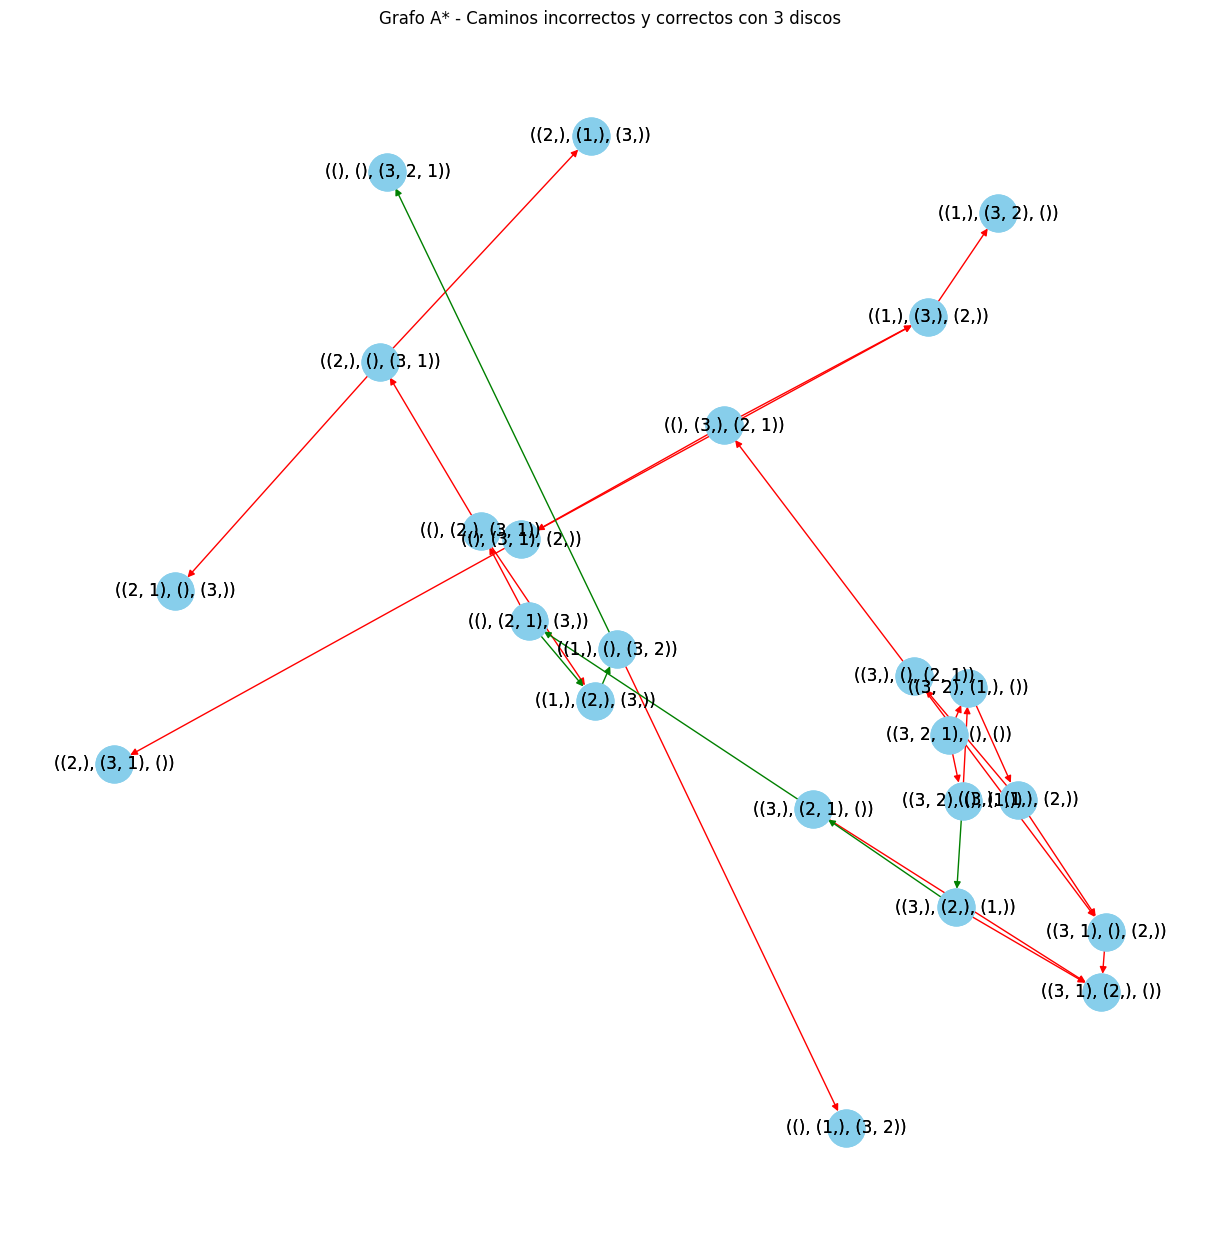

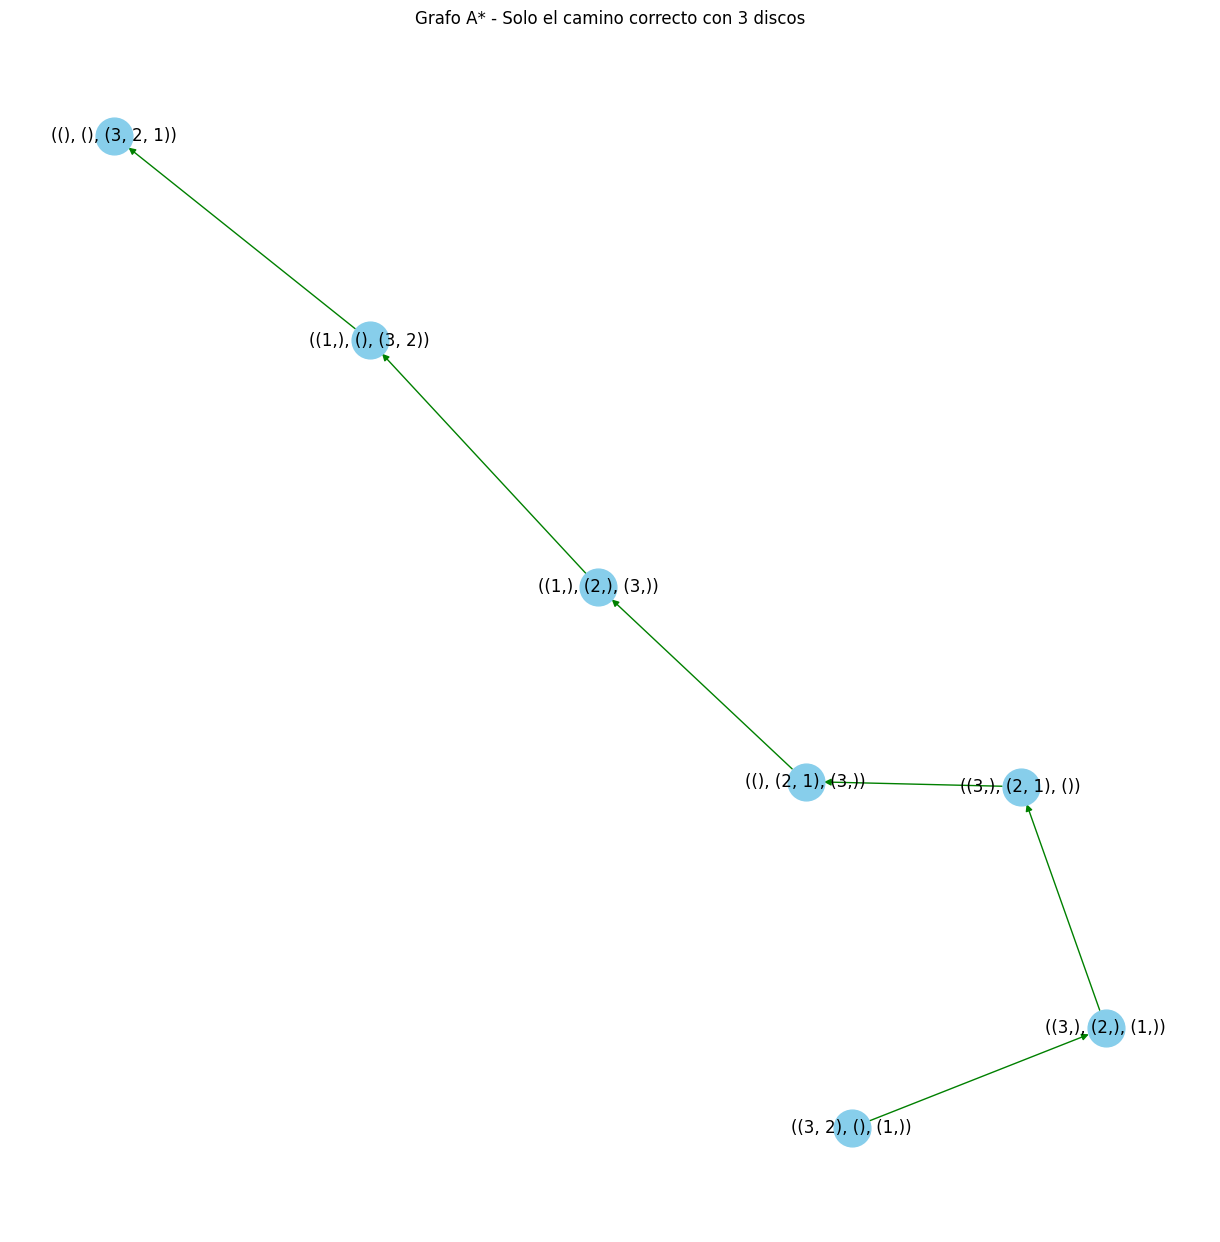

Solución A* con 3 discos: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]


In [29]:
n = 3
G, solution = astar_hanoi_graph(n)
draw_solution_paths(G, solution, n)
print(f"Solución A* con {n} discos: {solution}")


## Conclusión
En esta parte del código, implementamos y visualizamos el algoritmo A* aplicado al problema de la Torre de Hanoi. Logramos identificar los caminos correctos e incorrectos hacia la solución, lo que nos permite entender mejor la estructura de este problema clásico.
